# Image segmentation & contours

## Segmentation (تقسیم بندی)

تقسیم‌بندی (Segmentation) در تصاویر به فرآیندی گفته می‌شود که در آن تصویر به بخش‌های مختلف یا نواحی معنادار تقسیم می‌شود. هدف اصلی تقسیم‌بندی، ساده‌سازی یا تغییر نمایش تصویر به گونه‌ای است که تحلیل آن آسان‌تر شود. این بخش‌ها معمولاً بر اساس ویژگی‌هایی مانند رنگ، شدت روشنایی یا بافت شناسایی می‌شوند.

در OpenCV، تقسیم‌بندی تصاویر کاربردهای متنوعی دارد، از جمله:
- **شناسایی اشیاء**: برای تشخیص و جداسازی اشیاء خاص در تصویر.
- **ردیابی اشیاء**: برای دنبال کردن حرکت اشیاء در ویدیوها.
- **تحلیل تصاویر پزشکی**: برای شناسایی نواحی خاص مانند تومورها در تصاویر پزشکی.
- **بینایی ماشین**: برای کاربردهایی مانند تشخیص چهره، پلاک خودرو و غیره.

ابزارها و الگوریتم‌های مختلفی در OpenCV برای تقسیم‌بندی تصاویر وجود دارد، مانند استفاده از آستانه‌گذاری (Thresholding)، خوشه‌بندی (Clustering) و الگوریتم‌های پیشرفته‌تر مانند Watershed و GrabCut. این ابزارها به کاربران کمک می‌کنند تا تصاویر را به صورت دقیق‌تر تحلیل و پردازش کنند.

## Contours

کانتور (Contour) به خطوط یا منحنی‌هایی گفته می‌شود که مرزهای اشیاء در تصویر را مشخص می‌کنند. کانتورها یکی از ابزارهای کلیدی در پردازش تصویر هستند و برای شناسایی، تحلیل و استخراج ویژگی‌های اشیاء در تصویر به کار می‌روند.

### کاربردهای اصلی کانتورها:
- **تشخیص اشیاء**: برای شناسایی و جداسازی اشیاء در تصویر.
- **تحلیل شکل**: برای بررسی ویژگی‌های هندسی اشیاء مانند مساحت، محیط و تقارن.

در OpenCV، برای استخراج کانتورها معمولاً از تابع `cv2.findContours` استفاده می‌شود. این تابع یک تصویر دودویی (Binary) را به عنوان ورودی دریافت کرده و کانتورها را به همراه سلسله‌مراتب آن‌ها بازمی‌گرداند. استفاده از کانتورها در کاربردهایی مانند تشخیص لبه‌ها، ردیابی اشیاء و تحلیل تصاویر پزشکی بسیار رایج است.

## پیاده سازی مثالی در رابطه با کانتورها

In [2]:
import cv2
import numpy as np

# Load the image of three square
image = cv2.imread("square.png")
cv2.imshow("input image",image)
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find canny edges
edged = cv2.Canny(gray,30,200)
cv2.imshow("Canny edges",edged)
cv2.waitKey(0)

# Finding Contours
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.imshow("Canny edges after contouring",edged)
cv2.waitKey(0)
print(contours)
print("Number of contours found = " + str(len(contours)))

# Draw all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2.imshow("Contours", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([[[689, 187]],

       [[687, 189]],

       [[687, 371]],

       [[688, 372]],

       [[877, 372]],

       [[877, 188]],

       [[876, 187]]], dtype=int32), array([[[ 22, 102]],

       [[ 20, 104]],

       [[ 20, 355]],

       [[ 21, 356]],

       [[256, 356]],

       [[256, 103]],

       [[255, 102]]], dtype=int32), array([[[342,  56]],

       [[340,  58]],

       [[340, 451]],

       [[341, 452]],

       [[638, 452]],

       [[638,  57]],

       [[637,  56]]], dtype=int32))
Number of contours found = 3


در کد بالا، مراحل زیر انجام شده است:

1. **بارگذاری تصویر**:
    تصویر با استفاده از تابع `cv2.imread` بارگذاری شده و در متغیر `image` ذخیره شده است. سپس با استفاده از `cv2.imshow` نمایش داده شده و با `cv2.waitKey(0)` منتظر فشردن کلیدی برای ادامه مانده است.

2. **تبدیل به تصویر خاکستری**:
    تصویر رنگی به تصویر خاکستری تبدیل شده است. این کار با استفاده از تابع `cv2.cvtColor` و پارامتر `cv2.COLOR_BGR2GRAY` انجام شده و نتیجه در متغیر `gray` ذخیره شده است. این متغیر حاوی آرایه‌ای از مقادیر شدت روشنایی پیکسل‌ها است.

3. **استخراج لبه‌ها با الگوریتم Canny**:
    با استفاده از تابع `cv2.Canny`، لبه‌های تصویر خاکستری استخراج شده و در متغیر `edged` ذخیره شده است. این لبه‌ها با استفاده از مقادیر آستانه 30 و 200 مشخص شده‌اند. سپس تصویر لبه‌ها نمایش داده شده است. متغیر `edged` یک آرایه دودویی است که لبه‌ها را نشان می‌دهد.

4. **یافتن کانتورها**:
    با استفاده از تابع `cv2.findContours`، کانتورها (مرزهای اشیاء) در تصویر لبه‌یابی شده پیدا شده‌اند. این تابع کانتورها را به همراه سلسله‌مراتب آن‌ها بازمی‌گرداند. کانتورها در متغیر `contours` و سلسله‌مراتب در متغیر `hierarchy` ذخیره شده‌اند. متغیر `contours` شامل یک لیست از آرایه‌های نقاط مختصات کانتورها است و طول آن برابر با تعداد کانتورها (3 کانتور) است.

5. **رسم کانتورها روی تصویر اصلی**:
    با استفاده از تابع `cv2.drawContours`، تمامی کانتورها روی تصویر اصلی رسم شده‌اند. رنگ کانتورها سبز `(0, 255, 0)` و ضخامت خطوط 3 پیکسل است. تصویر نهایی که کانتورها روی آن رسم شده‌اند، نمایش داده شده است.

6. **بستن تمامی پنجره‌ها**:
    در پایان، با استفاده از `cv2.destroyAllWindows` تمامی پنجره‌های باز بسته شده‌اند.

این کد به طور کلی برای شناسایی و نمایش کانتورها (مرزهای اشیاء) در یک تصویر استفاده می‌شود. متغیرهای `contours`، `edged`، `gray`، `hierarchy` و `image` در این فرآیند نقش کلیدی دارند و اطلاعات مربوط به کانتورها و تصویر پردازش‌شده را ذخیره می‌کنند.

## سلسله مراتب در کانتوره (Hierarchy)

در پردازش تصویر، کانتورها می‌توانند به صورت سلسله‌مراتبی سازمان‌دهی شوند. این سلسله‌مراتب به ما کمک می‌کند تا روابط بین کانتورها را درک کنیم. به عنوان مثال، ممکن است یک کانتور درون کانتور دیگری قرار داشته باشد (مانند یک دایره کوچک درون یک دایره بزرگ‌تر). OpenCV این سلسله‌مراتب را با استفاده از آرایه‌ای به نام `hierarchy` مدیریت می‌کند.

#### ساختار `hierarchy`
آرایه `hierarchy` یک آرایه چندبعدی است که اطلاعات مربوط به هر کانتور را ذخیره می‌کند. هر کانتور دارای چهار مقدار است:
1. **Next**: اندیس کانتور بعدی در همان سطح. اگر کانتور بعدی وجود نداشته باشد، مقدار آن `-1` است.
2. **Previous**: اندیس کانتور قبلی در همان سطح. اگر کانتور قبلی وجود نداشته باشد، مقدار آن `-1` است.
3. **First Child**: اندیس اولین کانتور فرزند. اگر کانتور فرزندی وجود نداشته باشد، مقدار آن `-1` است.
4. **Parent**: اندیس کانتور والد. اگر کانتور والدی وجود نداشته باشد، مقدار آن `-1` است.

#### انواع سلسله‌مراتب
در OpenCV، می‌توان نوع سلسله‌مراتب را با استفاده از پارامتر `mode` در تابع `cv2.findContours` مشخص کرد. برخی از حالت‌های رایج عبارتند از:
- **cv2.RETR_EXTERNAL**: فقط کانتورهای خارجی (بیرونی) را استخراج می‌کند.
- **cv2.RETR_LIST**: تمام کانتورها را بدون در نظر گرفتن سلسله‌مراتب استخراج می‌کند.
- **cv2.RETR_CCOMP**: کانتورها را به صورت دو سطحی (سطح خارجی و داخلی) سازمان‌دهی می‌کند.
- **cv2.RETR_TREE**: تمام کانتورها را به همراه سلسله‌مراتب کامل استخراج می‌کند.

#### مثال
فرض کنید یک تصویر شامل چندین دایره تو در تو داریم. با استفاده از `cv2.RETR_TREE`، می‌توانیم اطلاعات مربوط به سلسله‌مراتب کانتورها را استخراج کنیم. این اطلاعات به ما کمک می‌کند تا بفهمیم کدام کانتور درون کانتور دیگر قرار دارد یا کدام کانتورها در یک سطح هستند.

به طور کلی، سلسله‌مراتب در کانتورها ابزاری قدرتمند برای تحلیل و پردازش تصاویر پیچیده است.
در کد قبلی که پیاده سازی شد سه مربع را در تصویر دیدیم ، حال بیایید تصور کنید که مربع سفیدی وسط یکی از مربع ها وجود دارد ، در این صورت مربع سفید شناسایی نمی شود ، بیایید مدل های دیگر را که نام بردیم در همان کد با تصویر جدید پیاده سازی کنیم

In [3]:
import cv2
import numpy as np

# Load the image of three square
image = cv2.imread("square_donat.png")
cv2.imshow("input image",image)
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find canny edges
edged = cv2.Canny(gray,30,200)
cv2.imshow("Canny edges",edged)
cv2.waitKey(0)

# Finding Contours --> | Changin RETR_EXTERNAL to RETR_LIST |
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.imshow("Canny edges after contouring",edged)
cv2.waitKey(0)

# Draw all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2.imshow("Contours", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Sorting Contours (مرتب سازی کانتور ها)

در پردازش تصویر، مرتب‌سازی کانتورها یکی از ابزارهای مهم برای تحلیل و پردازش دقیق‌تر تصاویر است. با مرتب‌سازی کانتورها می‌توان اطلاعات بیشتری درباره ترتیب، اندازه و موقعیت اشیاء موجود در تصویر به دست آورد. در OpenCV، می‌توان کانتورها را بر اساس معیارهای مختلفی مانند مساحت یا موقعیت مکانی مرتب کرد.

### Sorting by Area (مرتب‌سازی بر اساس مساحت )

یکی از روش‌های رایج برای مرتب‌سازی کانتورها، مرتب‌سازی بر اساس مساحت آن‌ها است. این روش به ما کمک می‌کند تا کانتورهای بزرگ‌تر یا کوچک‌تر را شناسایی کنیم. برای این کار، از تابع `cv2.contourArea` استفاده می‌شود که مساحت هر کانتور را محاسبه می‌کند.

#### مراحل:
1. محاسبه مساحت هر کانتور با استفاده از `cv2.contourArea`.
2. مرتب‌سازی کانتورها بر اساس مساحت به صورت صعودی یا نزولی.

#### کاربردها:
- شناسایی بزرگ‌ترین یا کوچک‌ترین اشیاء در تصویر.
- حذف نویزهای کوچک با مساحت کم.
- تحلیل اشیاء بر اساس اندازه.

### Sorting by Spatial Position (مرتب‌سازی بر اساس موقعیت مکانی )

در برخی موارد، نیاز است که کانتورها بر اساس موقعیت مکانی آن‌ها در تصویر مرتب شوند. این کار معمولاً بر اساس مختصات نقاط کانتور انجام می‌شود. برای این منظور، از مقدار `boundingRect` استفاده می‌شود که یک مستطیل محدودکننده برای هر کانتور ایجاد می‌کند.

#### مراحل:
1. محاسبه مستطیل محدودکننده هر کانتور با استفاده از `cv2.boundingRect`.
2. مرتب‌سازی کانتورها بر اساس مختصات `x` یا `y` مستطیل محدودکننده.

#### کاربردها:
- مرتب‌سازی اشیاء از چپ به راست یا از بالا به پایین.
- تحلیل ترتیب اشیاء در تصویر.
- شناسایی الگوهای خاص در تصاویر.

### به طور کلی:

مرتب‌سازی کانتورها ابزار قدرتمندی برای تحلیل دقیق‌تر تصاویر است. با استفاده از این روش‌ها می‌توان اطلاعات بیشتری درباره اشیاء موجود در تصویر به دست آورد و پردازش‌های پیشرفته‌تری انجام داد. انتخاب روش مرتب‌سازی به نوع کاربرد و هدف تحلیل تصویر بستگی دارد.

## نمونه کد مرتب سازی

### پیدا کردن کانتور ها در عکس جدید:

In [12]:
import cv2
import numpy as np

# Load the image of four shapes
image = cv2.imread("shapes.png")
cv2.imshow("Original Image",image)
cv2.waitKey(0)

# Create a blank image with some dimensions as our loaded image
blank_image = np.zeros((image.shape[0],image.shape[1],3))

# Create a copy of our original image
original_image = image

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find canny edges
edged = cv2.Canny(gray,50,200)
cv2.imshow("Canny edges",edged)
cv2.waitKey(0)

# Finding Contours 
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours found = ",len(contours))

# Draw all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2.imshow("Contours", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours found =  4


### مرتب سازی با استفاده از مساحت:

In [11]:
import cv2
import numpy as np

# Function we'll use to display contour area
def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load the image of four shapes
image = cv2.imread("shapes.png")
original_image = image

# lets print the areas of the contours before sorting
print("Contour Area before sorting")
print(get_contour_areas(contours))

# Sort contours by area in descending order
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# lets print the areas of the contours after sorting
print("Contour Area after sorting")
print(get_contour_areas(sorted_contours))

# Draw sorted contours on the blank image
for c in sorted_contours:
    cv2.drawContours(original_image,[c],-1,(255,0,0),3)
    cv2.waitKey(0)
    cv2.imshow('Contours by area',original_image)
# Display the sorted contours

cv2.waitKey(0)
cv2.destroyAllWindows()


Contour Area before sorting
[16677.0, 20899.0, 47330.0, 55773.0]
Contour Area after sorting
[55773.0, 47330.0, 20899.0, 16677.0]


در این کد، کانتورها بر اساس مساحت آن‌ها مرتب می‌شوند. ابتدا مساحت کانتورها قبل از مرتب‌سازی چاپ می‌شود. سپس کانتورها با استفاده از تابع `sorted` و بر اساس مساحت به صورت نزولی مرتب می‌شوند. در نهایت، مساحت کانتورها پس از مرتب‌سازی چاپ شده و کانتورهای مرتب‌شده روی تصویر اصلی رسم می‌شوند.



In [10]:
import cv2
import numpy as np

# Function to calculate the x-coordinate of the contour centroid
def x_cord_contours(contour):
    M = cv2.moments(contour)
    if M['m00'] != 0:
        return int(M['m10'] / M['m00'])
    return 0

# Function to label the contour center on the image
def label_contour_center(image, contour, index):
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)
        cv2.putText(image, f"{index + 1}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Load the image
image = cv2.imread('shapes.png')
original_image = image.copy()

# Convert to grayscale and detect edges
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 200)

# Find contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Label contour centers
for i, contour in enumerate(contours):
    label_contour_center(image, contour, i)

cv2.imshow("Contour Centers", image)
cv2.waitKey(0)

# Sort contours from left to right
contours_left_to_right = sorted(contours, key=x_cord_contours)

# Draw and label sorted contours
for i, contour in enumerate(contours_left_to_right):
    cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)
    label_contour_center(original_image, contour, i)

    # Crop and save each contour
    x, y, w, h = cv2.boundingRect(contour)
    cropped_contour = original_image[y:y + h, x:x + w]
    cv2.imwrite(f"output_shape_number_{i + 1}.png", cropped_contour)

cv2.imshow("Sorted Contours", original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

این کد برای شناسایی و مرتب‌سازی کانتورها در یک تصویر استفاده می‌شود. مراحل انجام‌شده در این کد به شرح زیر است:

1. **بارگذاری و پیش‌پردازش تصویر**:
    - تصویر بارگذاری شده و به مقیاس خاکستری تبدیل می‌شود.
    - با استفاده از الگوریتم Canny، لبه‌های تصویر استخراج می‌شوند.

2. **شناسایی کانتورها**:
    - کانتورها با استفاده از تابع `cv2.findContours` شناسایی می‌شوند.
    - مراکز کانتورها با استفاده از لحظه‌های هندسی (Moments) محاسبه شده و روی تصویر نمایش داده می‌شوند.

3. **مرتب‌سازی کانتورها**:
    - کانتورها بر اساس مختصات افقی (x) مرتب می‌شوند.
    - کانتورهای مرتب‌شده به ترتیب روی تصویر اصلی رسم می‌شوند.

4. **برش و ذخیره کانتورها**:
    - هر کانتور به صورت جداگانه برش داده شده و به عنوان یک تصویر جدید ذخیره می‌شود.

این کد از توابع OpenCV برای پردازش تصویر و تحلیل کانتورها استفاده می‌کند. قابلیت‌هایی مانند مرتب‌سازی کانتورها، نمایش مراکز آن‌ها و ذخیره کانتورهای برش‌خورده به صورت جداگانه را فراهم می‌کند. این فرآیند برای تحلیل دقیق‌تر اشیاء موجود در تصویر و پردازش‌های پیشرفته‌تر بسیار مفید است.

## Contour Approximation & Convex Hull 

در پردازش تصویر، گاهی اوقات نیاز داریم که شکل یک کانتور را ساده‌تر یا به صورت محدب نمایش دهیم. دو ابزار مهم برای این کار در OpenCV وجود دارد:

### تقریب کانتور (Contour Approximation)
تقریب کانتور به معنای ساده‌سازی شکل کانتور با حذف نقاط غیرضروری است. این کار با استفاده از الگوریتم Douglas-Peucker و تابع `cv2.approxPolyDP` انجام می‌شود. این تابع با توجه به یک پارامتر دقت (epsilon)، نقاط اضافی کانتور را حذف می‌کند و فقط نقاط کلیدی را نگه می‌دارد. این روش برای شناسایی اشکال هندسی (مانند مثلث، مربع و ...) بسیار مفید است.

### پوش محدب (Convex Hull)
پوش محدب کوچک‌ترین چندضلعی محدبی است که می‌تواند تمام نقاط کانتور را در بر بگیرد. با استفاده از تابع `cv2.convexHull` در OpenCV می‌توان پوش محدب یک کانتور را به دست آورد. این ابزار برای تحلیل شکل و شناسایی ویژگی‌های هندسی اشیاء کاربرد دارد.

### کاربردها
- ساده‌سازی شکل کانتور برای تحلیل سریع‌تر و راحت‌تر
- شناسایی اشکال هندسی خاص در تصویر
- بررسی محدب بودن یا نبودن یک شکل
- استخراج ویژگی‌های هندسی برای کاربردهای بینایی ماشین

در ادامه می‌توانید با استفاده از این توابع، کانتورهای شناسایی‌شده را تقریب زده و پوش محدب آن‌ها را رسم کنید. این کار به شما کمک می‌کند تا تحلیل دقیق‌تری روی اشیاء موجود در تصویر داشته باشید.

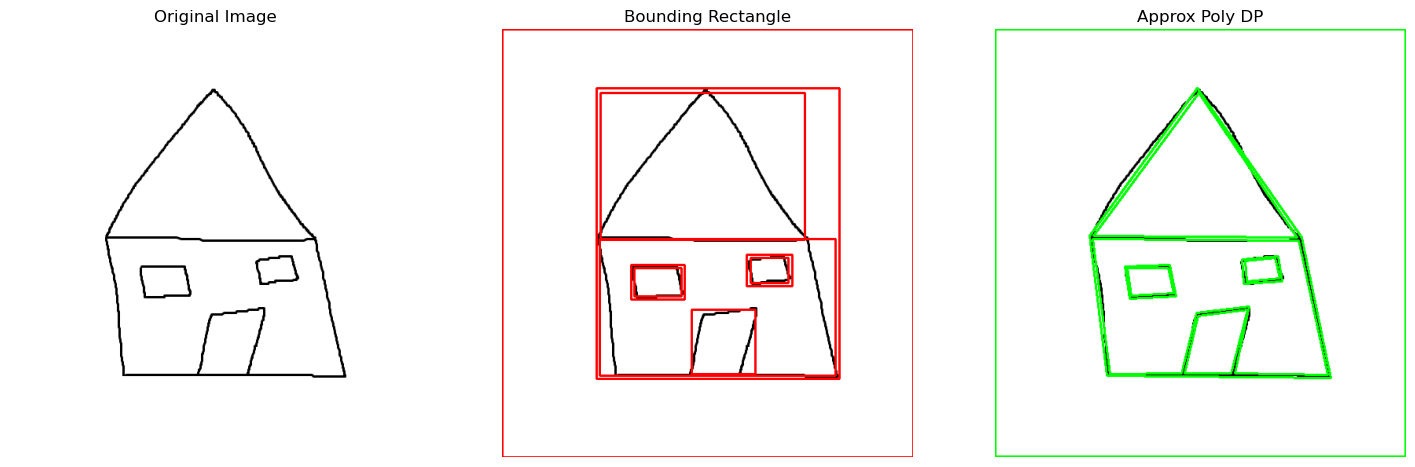

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and keep a copy
image = cv2.imread('house.png')
original_image = image.copy()

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 0, 255), 2)


# Iterate through each  contour and compute the approx contour
# Draw approximated contours on a copy to avoid overlapping
approx_image = image.copy()
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(approx_image, [approx], 0, (0, 255, 0), 2)

# Matplotlib subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Bounding Rectangle')
axs[1].axis('off')
axs[2].imshow(cv2.cvtColor(approx_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Approx Poly DP')
axs[2].axis('off')
plt.show()

همانطور که در کد بالا مشاهده می‌کنید، تصویر یک خانه با خطوطی نه‌چندان صاف داده شده است که از اشکالی مانند مستطیل و مربع‌های کج و یک مثلث تشکیل شده است. اگر با روش اول (استفاده از کانتورهای معمولی) اقدام به شناسایی کانتورها کنیم، مشاهده می‌شود که این روش نمی‌تواند به‌درستی مرز دقیق هر شکل را تشخیص دهد و فقط محدوده کلی اشکال را شناسایی می‌کند. اما با استفاده از تقریب کانتور (approxPolyDP)، کانتورها با دقت بیشتری استخراج می‌شوند و مرز هر شکل هندسی به‌درستی مشخص می‌شود. این موضوع اهمیت استفاده از تقریب کانتور را در شناسایی دقیق‌تر و ساده‌تر اشکال هندسی در تصاویر نشان می‌دهد.

### مثالی برای Convex Hull

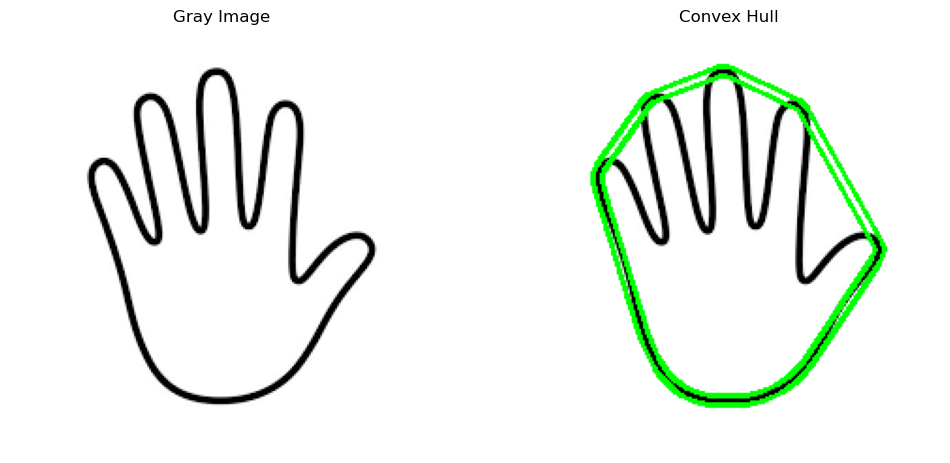

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('hand.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Sort contours by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]
# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)

# Matplotlib subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
axs[0].set_title('Gray Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Convex Hull')
axs[1].axis('off')
plt.show()


کد بالا تصویری از یک دست را بارگذاری کرده و ابتدا آن را به تصویر خاکستری تبدیل می‌کند. سپس با استفاده از آستانه‌گذاری (thresholding)، تصویر را به یک تصویر دودویی تبدیل می‌کند تا بتواند لبه‌ها و اشیاء را بهتر شناسایی کند. پس از آن، با استفاده از تابع `cv2.findContours` کانتورها (مرزهای اشیاء) را در تصویر پیدا می‌کند. در ادامه، کانتورها بر اساس مساحت مرتب می‌شوند و سپس برای هر کانتور، پوش محدب (Convex Hull) محاسبه و روی تصویر رسم می‌شود. در نهایت، تصویر نهایی که پوش محدب کانتورها روی آن کشیده شده است، نمایش داده می‌شود. این فرآیند برای شناسایی و نمایش مرزهای محدب اشیاء در تصویر کاربرد دارد.

## Matching Contour Shapes

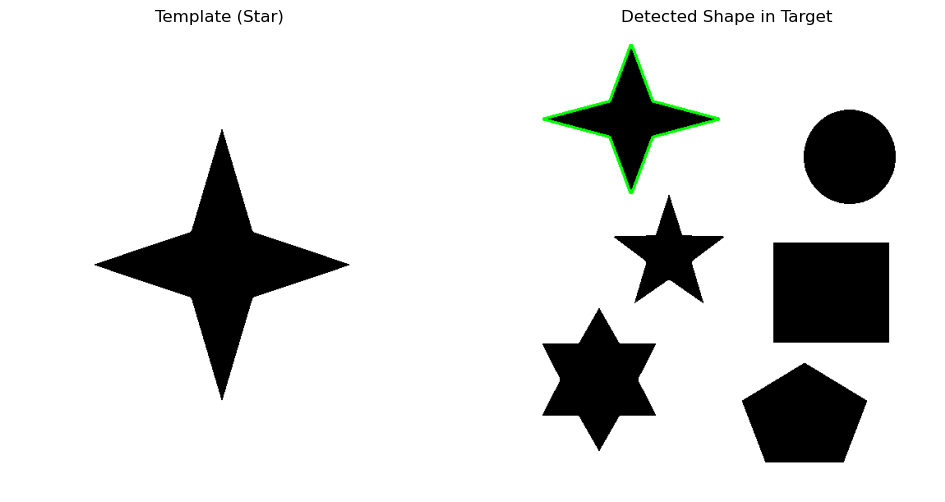

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the shape of template or reference image
template = cv2.imread('star.png')
cv2.imshow("Original image",template)
cv2.waitKey(0)

# Load the target image with shapes that we're trying to match
target = cv2.imread("find_star.png")
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Convert template to grayscale before thresholding
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(template_gray, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest contour which is the image outline
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

best_match = None
min_match = float('inf')
for c in contours:
    match = cv2.matchShapes(template_contour, c, 1, 0.0)
    if match < min_match:
        min_match = match
        best_match = c

# Draw only if a valid match is found and is reasonably similar
if best_match is not None and min_match < 0.15:
    cv2.drawContours(target, [best_match], -1, (0, 255, 0), 2)
    cv2.imshow('Output', target)
    cv2.waitKey(0)
else:
    print("No sufficiently similar contour found.")

# Matplotlib subplot for visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
axs[0].set_title('Template (Star)')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
axs[1].set_title('Detected Shape in Target')
axs[1].axis('off')
plt.show()

در این کد، هدف شناسایی و تطبیق یک شکل خاص (مثلاً ستاره) در یک تصویر هدف با استفاده از یک تصویر الگو (template) است. مراحل انجام کار به شرح زیر است:

1. **بارگذاری تصاویر**  
    ابتدا تصویر الگو (`star.png`) و تصویر هدف (`find_star.png`) بارگذاری می‌شوند.

2. **تبدیل به خاکستری و آستانه‌گذاری**  
    هر دو تصویر به مقیاس خاکستری تبدیل شده و سپس با استفاده از آستانه‌گذاری (thresholding) به تصاویر دودویی تبدیل می‌شوند تا استخراج کانتورها آسان‌تر شود.

3. **یافتن کانتورهای تصویر الگو**  
    کانتورهای تصویر الگو استخراج می‌شوند. معمولاً بزرگ‌ترین کانتور مربوط به حاشیه تصویر است، بنابراین کانتورها بر اساس مساحت مرتب شده و دومین کانتور بزرگ به عنوان کانتور الگو انتخاب می‌شود.

4. **یافتن کانتورهای تصویر هدف**  
    کانتورهای تصویر هدف نیز استخراج می‌شوند.

5. **مقایسه و تطبیق کانتورها**  
    با استفاده از تابع `cv2.matchShapes`، کانتور الگو با هر یک از کانتورهای تصویر هدف مقایسه می‌شود تا بیشترین شباهت پیدا شود. کمترین مقدار خروجی این تابع نشان‌دهنده بیشترین شباهت است.

6. **نمایش نتیجه**  
    اگر کانتوری با شباهت کافی پیدا شود (مثلاً مقدار شباهت کمتر از 0.15 باشد)، آن کانتور روی تصویر هدف با رنگ سبز رسم می‌شود و نتیجه نمایش داده می‌شود. در غیر این صورت پیامی مبنی بر عدم یافتن شکل مشابه چاپ می‌شود.

این روش برای شناسایی اشکال مشابه در تصاویر مختلف بسیار کاربردی است و از قابلیت‌های تطبیق شکل در OpenCV بهره می‌برد.
